In [1]:
import cv2
import cv2.aruco as aruco
from glob import glob
import pandas as pd
from os.path import basename, isfile
from scipy import stats
import numpy as np

In [2]:
# Define the parameters for the Charuco board
num_squares_x = 5
num_squares_y = 7
square_length = 100
marker_length = 80

# Create the Charuco board
board = aruco.CharucoBoard(
    size=(num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
)

In [3]:
images = pd.DataFrame(glob(
    '../../../bilderserien/Focustest/fokus_serie/*.jpg'), columns=['path'])
images.reset_index(inplace=True)
images.rename(inplace=True, columns={"index": "img_id"})
images.set_index("img_id", inplace=True)
images["focus"] = [float(basename(i)[1:4]) for i in images["path"]]
images

,path,focus
img_id,,
0,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
1,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
2,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
3,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
4,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
5,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
6,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
7,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
8,../../../bilderserien/Focustest/fokus_serie/f1...,1.0


In [6]:
parameter = aruco.DetectorParameters()
parameter.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
charuo_detector = aruco.CharucoDetector(board, detectorParams=parameter)
marker_tmp = []
for img_id, img in images.iterrows():
    # Load the image
    image = cv2.imread(img["path"])

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    charuco_corners, charuco_ids, _, _ = charuo_detector.detectBoard(gray)

    # interpolateCornersCharuco(
    #    corners, ids, gray, board)
    for i in range(len(charuco_corners)):
        marker_tmp.append([img_id, charuco_corners[i][0][0],
                           charuco_corners[i][0][1], charuco_ids[i][0]])
marker = pd.DataFrame(
    marker_tmp, columns=["img_id", "corner_x", "corner_y", "marker_id"])

In [7]:
j = marker.join(images, on="img_id")
j

,img_id,corner_x,corner_y,marker_id,path,focus
0,0,2862.546631,696.803345,4,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
1,0,2887.457520,1098.379883,5,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
2,0,2908.903320,1521.819336,6,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
3,0,2938.313477,1973.782227,7,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
4,0,2453.947754,1105.304443,9,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
...,...,...,...,...,...,...
819,43,2946.234131,1954.337646,7,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
820,43,2454.588867,1104.816040,9,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
821,43,2475.489014,1516.446533,10,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
822,43,2036.644043,1102.852051,13,../../../bilderserien/Focustest/fokus_serie/f9...,9.0


In [8]:
k = j.groupby(["marker_id", "focus",]).agg(
    {"corner_x": "mean", "corner_y": "mean"})
# .pivot_table(index="focus", columns="marker_id", values=["corner_x", "corner_y"])

In [9]:
c = ((0.0047)/0.0000014)
k["corner_x_norm"] = (k["corner_x"]-2304)/c
k["corner_y_norm"] = (k["corner_y"]-(2592/2))/c

In [10]:
tmp = k.reset_index()
print(tmp.groupby("focus").count())
m = tmp[tmp["focus"] == 5.0]["marker_id"].unique()
m

       marker_id  corner_x  corner_y  corner_x_norm  corner_y_norm
focus                                                             
0.5           15        15        15             15             15
1.0           16        16        16             16             16
2.0           24        24        24             24             24
3.0           24        24        24             24             24
4.0           24        24        24             24             24
5.0           24        24        24             24             24
6.0           24        24        24             24             24
7.0           24        24        24             24             24
8.0           19        19        19             19             19
9.0           16        16        16             16             16
10.0           8         8         8              8              8


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [11]:
k["corner_x_faktor"] = 0
k["corner_y_faktor"] = 0
k

corner_x     corner_y  corner_x_norm  corner_y_norm  \
marker_id focus                                                           
0         0.5    3212.007568   739.286072       0.270470      -0.165830   
          1.0    3215.080811   734.674683       0.271386      -0.167203   
          2.0    3218.571533   735.035889       0.272426      -0.167096   
          3.0    3226.716797   730.388367       0.274852      -0.168480   
          4.0    3234.414551   725.457886       0.277145      -0.169949   
...                      ...          ...            ...            ...   
23        3.0    1179.171875  1955.535767      -0.335055       0.196457   
          4.0    1166.965942  1962.804810      -0.338691       0.198623   
          5.0    1157.729858  1968.255615      -0.341442       0.200246   
          6.0    1150.678223  1972.165527      -0.343543       0.201411   
          7.0    1144.643188  1975.261719      -0.345340       0.202333   

                 corner_x_faktor  corner_y_faktor  
marker_id focus                                    
0         0.5                  0                0  
          1.0                  0                0  
          2.0                  0                0  
          3.0                  0                0  
          4.0                  0                0  
...                          ...              ...  
23        3.0                  0                0  
          4.0                  0                0  
          5.0                  0                0  
          6.0                  0                0  
          7.0                  0                0  

[218 rows x 6 columns]

In [12]:
for i in m:
    ref = k.loc[i, 5.0]
    for s in k.loc[i].index:
        k.at[(i, s), "corner_x_faktor"] = k.loc[i,
                                                s]["corner_x_norm"] / ref["corner_x_norm"]
        k.at[(i, s), "corner_y_faktor"] = k.loc[i,
                                                s]["corner_y_norm"] / ref["corner_y_norm"]

/tmp/ipykernel_5506/3448089226.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9681779117307312' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_x_faktor"] = k.loc[i,
/tmp/ipykernel_5506/3448089226.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9680333433801882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_y_faktor"] = k.loc[i,


In [13]:
faktor = k.groupby("focus").agg(
    {"corner_x_faktor": "mean", "corner_y_faktor": "mean"})
faktor

,corner_x_faktor,corner_y_faktor
focus,,
0.5,0.966507,0.965608
1.0,0.972109,0.969783
2.0,0.977703,0.976030
3.0,0.980785,0.981910
4.0,0.991063,0.990652
5.0,1.000000,1.000000
6.0,1.005999,1.006321
7.0,1.009886,1.012152
8.0,1.013507,1.017917


In [14]:
f = 0.00474
faktor["faktor_soll"] = ((1./f)-5.) / ((1./f)-faktor.reset_index()["focus"])
faktor

,corner_x_faktor,corner_y_faktor,faktor_soll
focus,,,
0.5,0.966507,0.965608,NaN
1.0,0.972109,0.969783,0.980950
2.0,0.977703,0.976030,0.985644
3.0,0.980785,0.981910,0.990383
4.0,0.991063,0.990652,0.995168
5.0,1.000000,1.000000,1.000000
6.0,1.005999,1.006321,1.004879
7.0,1.009886,1.012152,1.009805
8.0,1.013507,1.017917,1.014780


<AxesSubplot: xlabel='focus'>

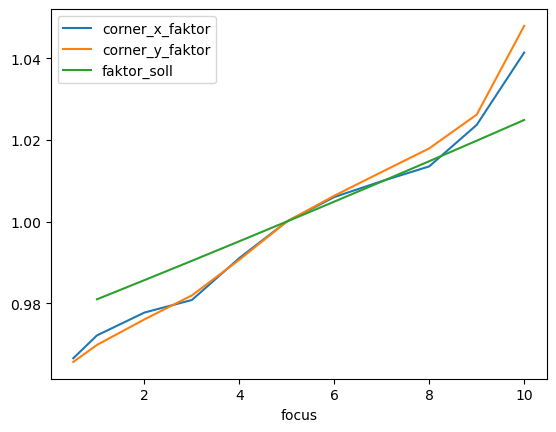

In [15]:
faktor.plot()

In [16]:
sift = cv2.SIFT_create()  # type: ignore

for img_id, img in images.iterrows():
    if isfile(img["path"] + '.npz'):
        continue
    # Load the image
    image = cv2.imread(img["path"])

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect SURF keypoints and compute descriptors
    kp, des = sift.detectAndCompute(gray, None)
    pt = np.array([n.pt for n in kp])
    np.savez_compressed(img["path"] + '.npz', des=des, pt=pt)

In [17]:
# Load the image
image1: str = list(images[images["focus"] == 5.]["path"])[0]
image2: str = list(images[images["focus"] == 2.]["path"])[0]

In [18]:
def match(image1: str, image2: str):
    data1 = np.load(image1 + '.npz')
    data2 = np.load(image2 + '.npz')
    k1, d1 = data1["pt"], data1["des"]
    k2, d2 = data2["pt"], data2["des"]

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(d1, d2, k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.7*n.distance and np.linalg.norm(k1[m.queryIdx]-k2[m.trainIdx], ord=1) < 200:
            good.append(m)

    matches = pd.DataFrame(np.array([[k1[m.queryIdx], k2[m.trainIdx]]
                                     for m in good]).reshape(-1, 4), columns=["x1", "y1", "x2", "y2"])
    return matches

In [19]:
matches = match(image1, image2)

In [20]:
matches

,x1,y1,x2,y2
0,79.352409,2226.566650,109.151573,2212.307129
1,82.459015,812.592163,113.761269,820.384277
2,93.688499,2397.909668,124.175102,2382.551514
3,106.484169,1878.910278,138.128464,1871.570557
4,108.072090,2096.000000,135.505753,2084.498535
...,...,...,...,...
290,4357.310547,1646.771973,4319.935059,1636.077881
291,4400.502930,2239.070557,4367.531250,2227.389160
292,4425.754883,1953.508911,4393.627441,1944.892822
293,4459.503906,2318.824463,4429.005371,2302.740234


<AxesSubplot: xlabel='x1', ylabel='diff_x'>

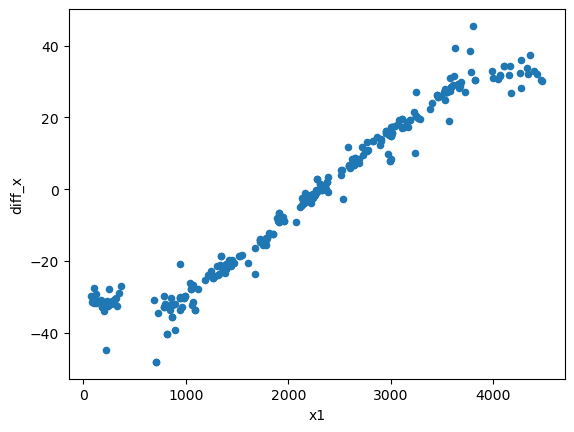

In [21]:
matches["diff_x"] = matches["x1"]-matches["x2"]
matches["diff_y"] = matches["y1"]-matches["y2"]
matches["distance"] = np.sqrt(matches["diff_x"]**2+matches["diff_y"]**2)
# matches = matches[matches["distance"] < 250]
matches.plot.scatter(x="x1", y="diff_x")

In [22]:
from sklearn.linear_model import LinearRegression
x = matches[['x1']]
y = matches[['diff_x']]
model = LinearRegression()
model.fit(x, y)
ax = model.coef_[0][0]
mx = model.intercept_[0]
dx = mx/ax
ax, dx

(0.019261127742776774, -2308.8578843711307)

In [23]:
from sklearn.linear_model import LinearRegression
x = matches[['y1']]
y = matches[['diff_y']]
model = LinearRegression()
model.fit(x, y)
ay = model.coef_[0][0]
my = model.intercept_[0]
dy = my/ay
ay, dy

(0.021550810031682712, -1303.1078473448786)

In [24]:
matches["x1n"] = matches["x1"]+dx
matches["y1n"] = matches["y1"]+dy

<AxesSubplot: xlabel='dn', ylabel='distance_'>

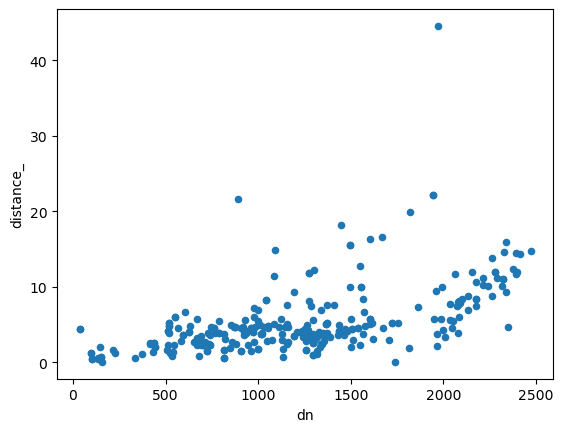

In [25]:
matches["diff_x_"] = matches["diff_x"]-matches["x1n"]*ax
matches["diff_y_"] = matches["diff_y"]-matches["y1n"]*ay
matches["distance_"] = np.sqrt(matches["diff_x_"]**2+matches["diff_y_"]**2)
matches["dn"] = np.sqrt(matches["x1n"]**2+matches["y1n"]**2)
matches.plot.scatter(x="dn", y="distance_")

<AxesSubplot: xlabel='x1n', ylabel='diff_faktor'>

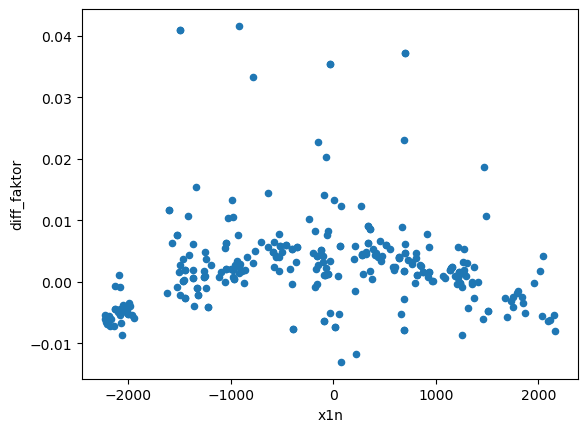

In [26]:
matches["diff_faktor"] = (
    matches["diff_x_"]/matches["x1n"] + matches["diff_y_"]/matches["y1n"])/2

matches[abs(matches["diff_faktor"]) < 0.05].plot.scatter(
    x="x1n", y="diff_faktor")

0.004285808184323535 0.1215251799397814


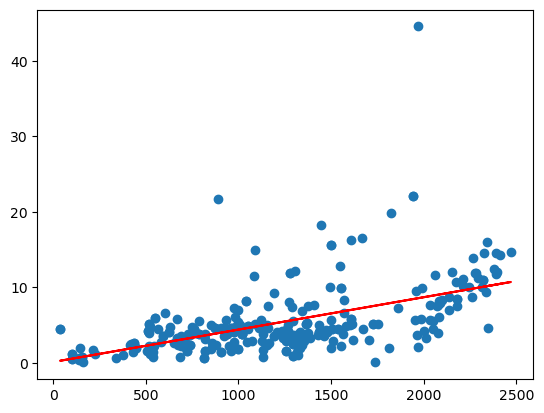

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = matches[['dn']]
y = matches[['distance_']]
model = LinearRegression()
model.fit(x, y)
print(model.coef_[0][0], model.intercept_[0])

y_pred = model.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [28]:
ko, do = None, None

image1 = list(images[images["focus"] == 5.]["path"])[0]
joined = None
for fokus in [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10]:
    matches = match(image1, list(images[images["focus"] == fokus]["path"])[0])
    matches.rename(inplace=True, columns={
                   "x1": "x_5", "y1": "y_5", "x2": f"x_{fokus}", "y2": f"y_{fokus}"})

    matches.set_index(["x_5", "y_5"], inplace=True)
    if joined is None:
        joined = matches
    else:
        joined = joined.join(matches, rsuffix=fokus)
    joined.dropna(inplace=True)
joined.reset_index(inplace=True)
joined.sort_values(by="x_5", inplace=True)
joined.drop_duplicates(inplace=True)
joined

,x_5,y_5,x_0.5,y_0.5,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,707.089966,2405.148193,781.992432,2348.021729,773.226746,2353.816650,755.209839,2367.543701,739.879272,2379.799316,...,699.953735,2409.564453,693.564758,2413.587158,693.104797,2411.922363,693.021423,2410.312744,691.413574,2410.583740
16,800.475952,1893.690186,848.677368,1874.554199,843.597900,1876.454346,832.506409,1880.296875,821.933533,1885.103516,...,790.284973,1898.174194,780.157532,1902.470215,770.534607,1906.852295,761.433167,1910.756104,753.280457,1914.445801
17,897.919617,1040.989868,945.280029,1051.243530,939.581299,1050.234497,929.904602,1048.018311,918.486084,1045.994995,...,887.765991,1038.781372,878.046204,1038.700195,868.637268,1037.076782,858.680237,1036.317627,850.736633,1034.948242
18,967.420837,1335.560425,1015.484924,1334.574707,1010.545227,1334.408569,1000.108459,1334.030151,988.980652,1334.783813,...,958.394409,1335.781128,949.807495,1336.206909,940.896851,1336.445435,931.921143,1336.592651,923.039795,1337.111572
19,1044.332397,1723.283447,1080.708374,1709.296387,1077.775269,1710.316650,1070.524292,1713.383423,1062.376221,1716.435791,...,1034.461548,1726.427368,1024.760742,1729.366089,1014.604919,1732.073242,1004.781128,1734.898682,990.109253,1737.978149
20,1062.927246,954.554626,1103.846436,966.641357,1099.777466,965.078979,1089.589600,962.009888,1080.122437,959.746582,...,1051.459351,952.937439,1042.641968,950.147583,1034.889282,947.033997,1025.805786,944.686890,1017.045166,941.382141
21,1120.781372,867.386597,1161.903809,882.402588,1157.376343,880.486511,1148.630127,877.306824,1139.145508,874.242432,...,1112.975586,864.624939,1102.708618,860.480286,1093.700928,855.739136,1084.197754,853.331360,1075.590454,849.775269
22,1216.869751,2345.082764,1252.989136,2311.392090,1248.995728,2314.680420,1240.769775,2322.029541,1232.986572,2329.367188,...,1208.711304,2352.598389,1200.714111,2359.731934,1193.328857,2366.901367,1185.949219,2373.933594,1179.697632,2380.331787
23,1250.928345,2066.228760,1286.033203,2045.581543,1282.493774,2047.366089,1273.837769,2051.648193,1267.392578,2054.151855,...,1240.384644,2070.991699,1235.461670,2078.399902,1225.939209,2084.950439,1220.433105,2090.022705,1213.319580,2098.015381
106,1252.913208,2181.571533,1289.490845,2144.533447,1284.909424,2150.855225,1277.508057,2156.421387,1269.010986,2166.053955,...,1245.043579,2187.654785,1237.448730,2194.104736,1230.456909,2199.417480,1222.399292,2205.385986,1216.143921,2210.762939


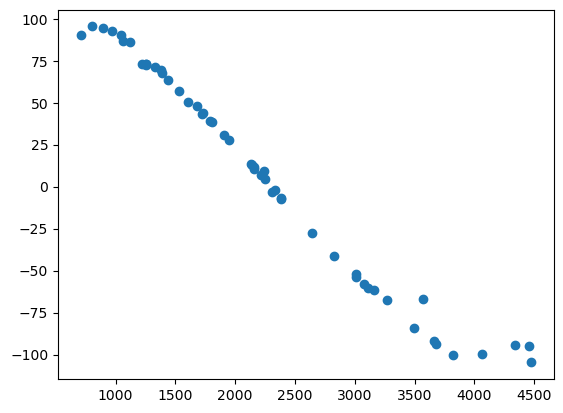

In [29]:
plt.scatter(joined["x_5"], joined["x_0.5"]-joined["x_10"])

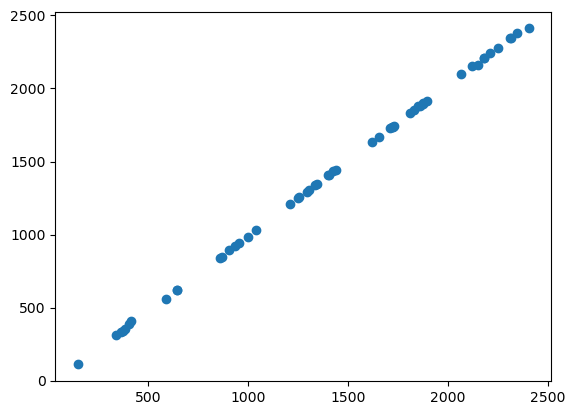

In [30]:
plt.scatter(joined["y_5"], joined["y_10"])

In [31]:
faktoren = []
for fokus in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    x = joined[[f"x_{fokus}"]]
    y = joined[[f"x_5"]]
    model = LinearRegression()
    model.fit(x, y)
    faktoren.append([fokus, model.coef_[0][0], model.intercept_[0]])
faktoren = pd.DataFrame(faktoren, columns=["fokus", "faktor", "offset"])
faktoren

,fokus,faktor,offset
0,0.5,1.031415,-7.595037e+01
1,1.0,1.028000,-6.747955e+01
2,2.0,1.020797,-5.017223e+01
3,3.0,1.013889,-3.337094e+01
4,4.0,1.006275,-1.489648e+01
5,5.0,1.000000,4.547474e-13
6,6.0,0.993093,1.618265e+01
7,7.0,0.986527,3.127459e+01
8,8.0,0.980627,4.506885e+01
9,9.0,0.974875,5.866144e+01


<AxesSubplot: xlabel='fokus', ylabel='faktor'>

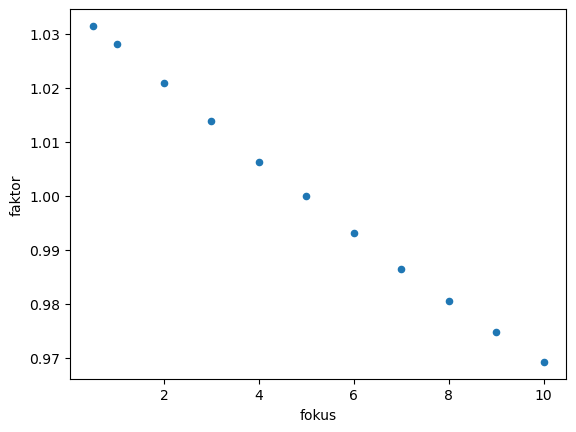

In [32]:
faktoren.plot.scatter(x="fokus", y="faktor")

<AxesSubplot: xlabel='fokus', ylabel='offset'>

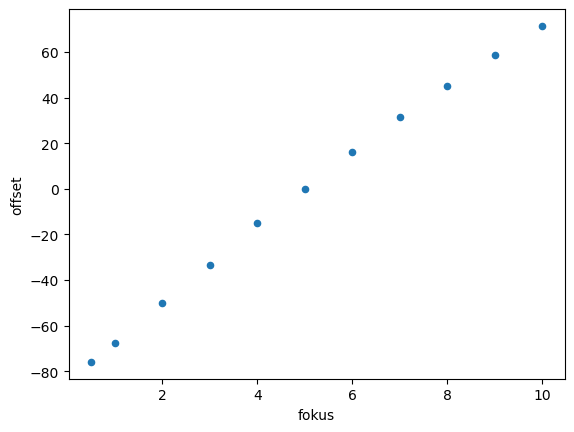

In [33]:
faktoren.plot.scatter(x="fokus", y="offset")

In [34]:
x = faktoren[["fokus"]]
y = faktoren[["offset"]]
model = LinearRegression()
model.fit(x, y)
model.coef_[0][0], model.intercept_[0]

(15.685526137243933, -80.88921656357364)

In [35]:
x = faktoren[["fokus"]]
y = faktoren[["faktor"]]
model = LinearRegression()
model.fit(x, y)
model.coef_[0][0], model.intercept_[0]

(-0.006615783908980771, 1.0338128227806382)

In [36]:
d = pd.DataFrame()
for fokus in [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10]:
    n = joined[["y_5", "x_5", f"y_{fokus}", f"x_{fokus}"]]
    n.rename(inplace=True, columns={
             f"y_{fokus}": "y_fokus", f"x_{fokus}": "x_fokus"})
    n["fokus"] = fokus
    d = pd.concat([d, n])

/tmp/ipykernel_5506/15706123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.rename(inplace=True, columns={
/tmp/ipykernel_5506/15706123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n["fokus"] = fokus
/tmp/ipykernel_5506/15706123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.rename(inplace=True, columns={
/tmp/ipykernel_5506/15706123.py:6: SettingWithCopyWarn

In [37]:
t = j.groupby(["marker_id", "focus"]).agg(
    {"corner_x": "mean", "corner_y": "mean"}).reset_index().set_index("marker_id")
t5 = t[t["focus"] == 5][["corner_x", "corner_y"]].rename(
    columns={"corner_x": "x_5", "corner_y": "y_5"})
tn5 = t[t["focus"] != 5].rename(
    columns={"corner_x": "x_fokus", "corner_y": "y_fokus"})
corner = t5.join(tn5)
corner.rename(inplace=True, columns={"focus": "fokus"})
d = pd.concat([d, corner])

In [38]:
d["dx"] = d["x_fokus"]-d["x_5"]
d["dy"] = d["y_fokus"]-d["y_5"]

In [40]:
d

,y_5,x_5,y_fokus,x_fokus,fokus,dx,dy
0,2405.148193,707.089966,2348.021729,781.992432,0.5,74.902466,-57.126465
16,1893.690186,800.475952,1874.554199,848.677368,0.5,48.201416,-19.135986
17,1040.989868,897.919617,1051.243530,945.280029,0.5,47.360413,10.253662
18,1335.560425,967.420837,1334.574707,1015.484924,0.5,48.064087,-0.985718
19,1723.283447,1044.332397,1709.296387,1080.708374,0.5,36.375977,-13.987061
...,...,...,...,...,...,...,...
23,1968.255615,1157.729858,1949.467773,1190.119141,2.0,32.389282,-18.787842
23,1968.255615,1157.729858,1955.535767,1179.171875,3.0,21.442017,-12.719849
23,1968.255615,1157.729858,1962.804810,1166.965942,4.0,9.236084,-5.450806
23,1968.255615,1157.729858,1972.165527,1150.678223,6.0,-7.051636,3.909912


In [39]:
x0 = [0.00, 2304, 1296,  0]
x0 = [9.72842924e-03,  2.30441042e+03,  1.29422688e+03, -2.00202317e-04]

In [57]:
from scipy.optimize import least_squares


def fun(x):
    fa1, dx, dy, s2 = x
    s1 = 5
    r = ((d["y_5"]-dy)**2+(d["x_5"]-dx)**2)**0.5
    fy = d["dy"] - (d["fokus"]-s1)*fa1*(d["y_5"]-dy) - \
        r*s2*(d["fokus"]-s1)*fa1*(d["y_5"]-dy)
    fx = d["dx"] - (d["fokus"]-s1)*fa1*(d["x_5"]-dx) -\
        r*s2*(d["fokus"]-s1)*fa1*(d["x_5"]-dx)
    d["dx_"] = fx
    d["dy_"] = fy
    f = (fx*fx+fy*fy)**0.5
    return f.to_list()


res = least_squares(fun, x0, verbose=1)
res.x

/tmp/ipykernel_5506/56457531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dx_"] = fx
/tmp/ipykernel_5506/56457531.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dy_"] = fy


`ftol` termination condition is satisfied.
Function evaluations 15, initial cost 7.7680e+03, final cost 7.7636e+03, first-order optimality 4.47e+03.


array([ 9.54981277e-03,  2.30865065e+03,  1.29079280e+03, -1.96934959e-04])

In [58]:
x0 = res.x
x0

array([ 9.54981277e-03,  2.30865065e+03,  1.29079280e+03, -1.96934959e-04])

In [59]:
d.std()

y_5        585.479928
x_5        935.477032
y_fokus    584.793004
x_fokus    935.109022
fokus        3.149496
dx          20.225601
dy          13.710175
dx_          2.770073
dy_          3.737192
dtype: float64

<AxesSubplot: xlabel='x_5', ylabel='dx_'>

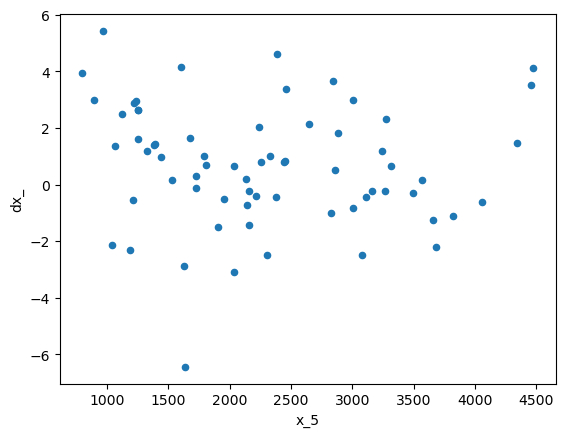

In [60]:
d[d["fokus"] == 1].plot.scatter(x="x_5", y="dx_")

In [61]:
# covariance matrix when jac not degenerate
from scipy import linalg

cov = linalg.inv(res.jac.T @ res.jac)
chi2dof = np.sum(res.fun**2)/(res.fun.size - res.x.size)
cov *= chi2dof
perr = np.sqrt(np.diag(cov))
perr

array([1.91512441e-04, 1.27383822e+01, 1.10429618e+01, 9.22883365e-06])

In [62]:
print(d.shape)
filter = np.array(fun(res.x)) < chi2dof
d = d[filter]
print(d.shape)

(707, 9)
(703, 9)


/tmp/ipykernel_5506/56457531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dx_"] = fx
/tmp/ipykernel_5506/56457531.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dy_"] = fy


In [63]:
res.x/perr

array([ 49.86523452, 181.23578076, 116.88827863, -21.33909508])

<AxesSubplot: xlabel='x_5', ylabel='y_5'>

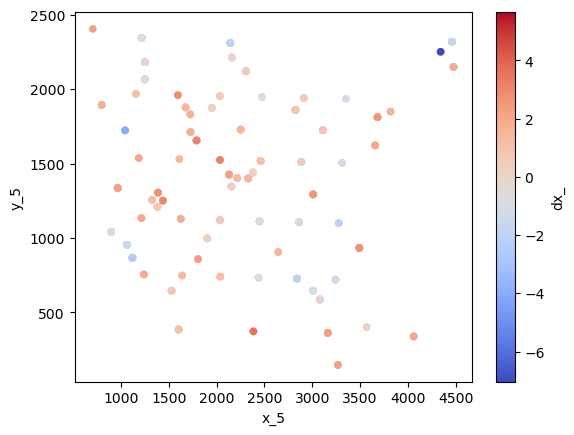

In [99]:
d.plot.scatter(x="x_5", y="y_5", c="dx_", cmap="coolwarm")

In [65]:
d

,y_5,x_5,y_fokus,x_fokus,fokus,dx,dy,dx_,dy_
16,1893.690186,800.475952,1874.554199,848.677368,0.5,48.201416,-19.135986,4.120130,-1.514359
17,1040.989868,897.919617,1051.243530,945.280029,0.5,47.360413,10.253662,3.840421,2.547429
18,1335.560425,967.420837,1334.574707,1015.484924,0.5,48.064087,-0.985718,5.658618,0.429694
19,1723.283447,1044.332397,1709.296387,1080.708374,0.5,36.375977,-13.987061,-3.659128,-0.292084
20,954.554626,1062.927246,966.641357,1103.846436,0.5,40.919189,12.086731,0.988556,1.308894
...,...,...,...,...,...,...,...,...,...
23,1968.255615,1157.729858,1949.467773,1190.119141,2.0,32.389282,-18.787842,8.088262,-4.483610
23,1968.255615,1157.729858,1955.535767,1179.171875,3.0,21.442017,-12.719849,5.241337,-3.183694
23,1968.255615,1157.729858,1962.804810,1166.965942,4.0,9.236084,-5.450806,1.135744,-0.682729
23,1968.255615,1157.729858,1972.165527,1150.678223,6.0,-7.051636,3.909912,1.048704,-0.858165


In [66]:
d[["x_fokus", "y_fokus"]].to_numpy()

array([[ 848.67736816, 1874.55419922],
       [ 945.2800293 , 1051.24353027],
       [1015.48492432, 1334.57470703],
       ...,
       [1166.96594238, 1962.80480957],
       [1150.67822266, 1972.16552734],
       [1144.64318848, 1975.26171875]])

In [91]:
dx0 = [0, 2304, 1296,  0,  0,  0,  0,  0,  0]
dx0 = [2.63572488e+01,  6.31322513e-01, -9.88069511e+00,  2.92706002e+01,
       -4.15690296e-03, -1.99188205e-02, -1.01408404e-04,  2.60612862e-06,
       2.79208519e-02]
dx0 = [3.11667482e+01,  4.82351739e+00, -9.80429488e+00,  2.87298410e+01,
       -1.68476605e-03, -3.03275218e-02, -4.72907996e-05, -6.99784738e-06,
       3.98423726e-02]


def dfun(x):
    diff = []
    for k, row in d.iterrows():
        cameraMatrix = np.array(
            [[3385+x[0]+x[3]*row["fokus"], 0, 2304+x[1]], [0, 3385+x[0]+x[3]*row["fokus"], 1296+x[2]], [0, 0, 1]])
        newCameraMatrix = np.array(
            [[3385+x[0]+x[3]*5, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*5, 1296+x[2]], [0, 0, 1]])
        distCoeffs = np.array([x[4:9]])*(row["fokus"]-5)
        a = cv2.undistortPoints(
            row[["x_fokus", "y_fokus"]].to_numpy(), cameraMatrix, distCoeffs, None, newCameraMatrix)
        b = row[["x_5", "y_5"]].to_numpy()
        dxy = b-a[0][0]
        diff.append(np.linalg.norm(dxy, ord=2))
    diff = np.array(diff).reshape(-1)
    return diff

In [93]:
dres = least_squares(dfun, dx0, verbose=2, ftol=0.1)
dx0 = dres.x
dx0

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.4683e+02                                    5.77e+04    
       1              2         8.4623e+02      6.02e-01       3.12e+01       4.80e+04    
       2              3         8.4621e+02      2.36e-02       7.81e+00       3.75e+04    
       3              4         8.4511e+02      1.10e+00       1.95e+00       3.68e+04    
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 8.4683e+02, final cost 8.4511e+02, first-order optimality 3.68e+04.


array([ 3.11667482e+01,  4.82351739e+00, -9.80429488e+00,  2.87298410e+01,
       -1.68476605e-03, -3.03275218e-02, -4.72907996e-05, -6.99784738e-06,
        3.98423726e-02])

In [94]:
dfun(dres.x).std()

0.9589232771020332

In [95]:
dcov = linalg.inv(dres.jac.T @ dres.jac)
dchi2dof = np.sum(dres.fun**2)/(dres.fun.size - dres.x.size)
dcov *= dchi2dof
dperr = np.sqrt(np.diag(dcov))
dperr

array([1.44358139e+05, 6.61674848e+00, 6.47317601e+00, 1.21409897e+03,
       1.42737186e-01, 5.12447677e+00, 1.99394505e-03, 3.01788670e-04,
       1.00992119e+01])

In [89]:
print(d.shape)
filter = np.array(dfun(dres.x)) < dchi2dof*0.5
d = d[filter]
print(d.shape)

(650, 9)
(542, 9)


In [96]:
dperr/dres.x

array([ 4.63179982e+03,  1.37176835e+00, -6.60238813e-01,  4.22591608e+01,
       -8.47222597e+01, -1.68971167e+02, -4.21634879e+01, -4.31259292e+01,
        2.53479179e+02])

In [220]:
image1 = cv2.imread(list(images[images["focus"] == 0.5]["path"])[0])
image2 = cv2.imread(list(images[images["focus"] == 10.]["path"])[0])
image3 = cv2.imread(list(images[images["focus"] == 5.]["path"])[0])

x = dres.x
cameraMatrix10 = np.array(
    [[3385+x[0]+x[3]*10, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*10, 1296+x[2]], [0, 0, 1]])
cameraMatrix05 = np.array(
    [[3385+x[0]+x[3]*0.5, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*0.5, 1296+x[2]], [0, 0, 1]])
newCameraMatrix5 = np.array(
    [[3385+x[0]+x[3]*5, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*5, 1296+x[2]], [0, 0, 1]])
distCoeffs10 = np.array([x[4:9]])*5
distCoeffs05 = np.array([x[4:9]])*-4.5
image2_ud = cv2.undistort(image2, cameraMatrix10,
                          distCoeffs10, None, newCameraMatrix5)
image1_ud = cv2.undistort(image1, cameraMatrix05,
                          distCoeffs05, None, newCameraMatrix5)
cv2.imwrite("image2_ud.jpg", image2_ud)
cv2.imwrite("image1_ud.jpg", image1_ud)
cv2.imwrite("image1.jpg", image1)
cv2.imwrite("image2.jpg", image2)
cv2.imwrite("image3.jpg", image3)

True

In [97]:
d

,y_5,x_5,y_fokus,x_fokus,fokus,dx,dy,dx_,dy_
16,1893.690186,800.475952,1874.554199,848.677368,0.5,48.201416,-19.135986,4.120130,-1.514359
17,1040.989868,897.919617,1051.243530,945.280029,0.5,47.360413,10.253662,3.840421,2.547429
18,1335.560425,967.420837,1334.574707,1015.484924,0.5,48.064087,-0.985718,5.658618,0.429694
20,954.554626,1062.927246,966.641357,1103.846436,0.5,40.919189,12.086731,0.988556,1.308894
21,867.386597,1120.781372,882.402588,1161.903809,0.5,41.122437,15.015991,2.752419,1.339315
...,...,...,...,...,...,...,...,...,...
22,1537.442383,1186.959961,1529.522095,1217.821045,1.0,30.861084,-7.920288,-2.295462,-0.629465
22,1537.442383,1186.959961,1535.648438,1196.110596,4.0,9.150635,-1.793945,0.861498,0.028760
22,1537.442383,1186.959961,1539.208496,1180.683594,6.0,-6.276367,1.766113,2.012769,-0.056592
23,1968.255615,1157.729858,1962.804810,1166.965942,4.0,9.236084,-5.450806,1.135744,-0.682729


<AxesSubplot: xlabel='x_5'>

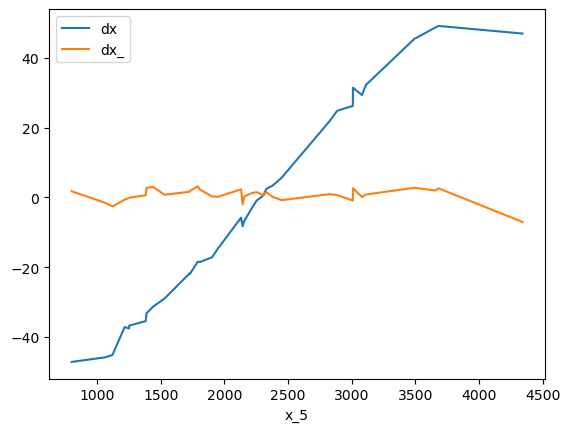

In [98]:
d[d["fokus"] == 10][["x_5", "dx", "dx_"]].set_index("x_5").sort_index().plot()

In [234]:
tp_karton = glob(
    '../../../bilderserien/TPKarton/**/camera01.jpg')
tp_karton = pd.DataFrame(tp_karton, columns=["path"])
tp_karton

,path
0,../../../bilderserien/TPKarton/F01/camera01.jpg
1,../../../bilderserien/TPKarton/F03/camera01.jpg
2,../../../bilderserien/TPKarton/F04/camera01.jpg
3,../../../bilderserien/TPKarton/F05/camera01.jpg
4,../../../bilderserien/TPKarton/F06/camera01.jpg
5,../../../bilderserien/TPKarton/F10/camera01.jpg


In [249]:
import re
tp_karton["focus"] = [
    float(re.search("(?<=\/F)\d{2}(?=\/)", i).group()) for i in tp_karton["path"]]
tp_karton

,path,focus
0,../../../bilderserien/TPKarton/F01/camera01.jpg,1.0
1,../../../bilderserien/TPKarton/F03/camera01.jpg,3.0
2,../../../bilderserien/TPKarton/F04/camera01.jpg,4.0
3,../../../bilderserien/TPKarton/F05/camera01.jpg,5.0
4,../../../bilderserien/TPKarton/F06/camera01.jpg,6.0
5,../../../bilderserien/TPKarton/F10/camera01.jpg,10.0


In [253]:
newCameraMatrix5 = np.array(
    [[3385+x[0]+x[3]*5, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*5, 1296+x[2]], [0, 0, 1]])
x = dres.x
for k, row in tp_karton.iterrows():
    image = cv2.imread(row["path"])
    cameraMatrix = np.array(
        [[3385+x[0]+x[3]*row["focus"], 0, 2304+x[1]], [0, 3385+x[0]+x[3]*row["focus"], 1296+x[2]], [0, 0, 1]])

    distCoeffs = np.array([x[4:9]])*(row["focus"]-5)
    image_ud = cv2.undistort(image, cameraMatrix,
                             distCoeffs, None, newCameraMatrix5)
    cv2.imwrite(f"tp_karton_{k}.jpg", image_ud)

In [259]:
bildschirm = glob(
    "/home/timm/bilder/f57de23e-247b-4329-b2d8-05bb0d83a63c/*.jpg")
bildschirm = pd.DataFrame(bildschirm, columns=["path"])
bildschirm["focus"] = [
    float(basename(i)[7:8]) for i in bildschirm["path"]]
bildschirm

,path,focus
0,/home/timm/bilder/f57de23e-247b-4329-b2d8-05bb...,3.0
1,/home/timm/bilder/f57de23e-247b-4329-b2d8-05bb...,4.0
2,/home/timm/bilder/f57de23e-247b-4329-b2d8-05bb...,5.0
3,/home/timm/bilder/f57de23e-247b-4329-b2d8-05bb...,1.0


In [260]:
newCameraMatrix5 = np.array(
    [[3385+x[0]+x[3]*5, 0, 2304+x[1]], [0, 3385+x[0]+x[3]*5, 1296+x[2]], [0, 0, 1]])
x = dres.x
for k, row in bildschirm.iterrows():
    image = cv2.imread(row["path"])
    cameraMatrix = np.array(
        [[3385+x[0]+x[3]*row["focus"], 0, 2304+x[1]], [0, 3385+x[0]+x[3]*row["focus"], 1296+x[2]], [0, 0, 1]])

    distCoeffs = np.array([x[4:9]])*(row["focus"]-5)
    image_ud = cv2.undistort(image, cameraMatrix,
                             distCoeffs, None, newCameraMatrix5)
    cv2.imwrite(f"bildschirm_{k}.jpg", image_ud)